<a href="https://colab.research.google.com/github/Komal-londhe/BigDataProcessing_GooglePlayStore/blob/main/603_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Google Play Store Analysis and rate prediction

In [ ]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

### Load Data using Spark

In [ ]:
spark = SparkSession.builder.master("local").appName("GooglePlayStoreAnalysis").getOrCreate()

In [ ]:
GoogleDf = spark.read.csv("/FileStore/tables/GooglePlayStore.csv", header="true", inferSchema="true")

In [ ]:
# Look at the data
display(GoogleDf)

_c0,App Name,App Id,Category,Rating,Rating Count,Minimum Installs,Maximum Installs,Free,Price,Currency,Developer Id,Released,Editors Choice,Scraped Time,SizeInBytes
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15.0,True,0.0,USD,Jean Confident Irénée NIYIZIBYOSE,2020-02-26,False,2021-06-15 20:19:35,10.0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.0,64.0,5000.0,7662.0,True,0.0,USD,Webserveis,2020-05-21,False,2021-06-15 20:19:35,2.9
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58.0,True,0.0,USD,Cabin Crew,2019-08-09,False,2021-06-15 20:19:35,3.7
3,Smart City Trichy Public Service Vehicles 17UCS548,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19.0,True,0.0,USD,Climate Smart Tech2,2018-09-10,False,2021-06-15 20:19:35,1.8
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478.0,True,0.0,USD,Rafal Milek-Horodyski,2020-02-21,False,2021-06-15 20:19:35,6.2
5,IMOCCI,com.imocci,Social,0.0,0.0,50.0,89.0,True,0.0,USD,Imocci GmbH,2018-12-24,False,2021-06-15 20:19:35,46.0
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.0,12.0,1000.0,2567.0,True,0.0,USD,android developer779,2019-09-23,False,2021-06-15 20:19:35,2.5
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500.0,702.0,True,0.0,USD,Mozaix LLC,2019-06-21,False,2021-06-15 20:19:35,16.0
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,5.0,820.0,50000.0,62433.0,True,0.0,USD,Free 2021 Themes for Emoji keyboard,2019-09-22,False,2021-06-15 20:19:35,3.5
10,Dodge The Cars!,com.MrScratchEnterprises.CarDogeGame,Racing,5.0,55.0,100.0,329.0,True,0.0,USD,MrScratch,2020-07-30,False,2021-06-15 20:19:35,51.0


In [ ]:
# Chck with the schema
GoogleDf.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- App Name: string (nullable = true)
 |-- App Id: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Rating Count: string (nullable = true)
 |-- Minimum Installs: double (nullable = true)
 |-- Maximum Installs: double (nullable = true)
 |-- Free: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Currency: string (nullable = true)
 |-- Developer Id: string (nullable = true)
 |-- Released: string (nullable = true)
 |-- Editors Choice: string (nullable = true)
 |-- Scraped Time: string (nullable = true)
 |-- SizeInBytes: string (nullable = true)



## Analysis - 1) Top 100 most downloaded Apps

In [ ]:
task1 = GoogleDf.select('App Name','Maximum Installs').sort('Maximum Installs', ascending = False)
task1.show(100)

+--------------------+----------------+
|            App Name|Maximum Installs|
+--------------------+----------------+
|     Samsung Gallery|   2.123105347E9|
|    Carrier Services|   1.793502218E9|
|      Subway Surfers|   1.704495994E9|
|Samsung Experienc...|   1.682763021E9|
|SHAREit - Transfe...|   1.666016612E9|
|              TikTok|   1.645811582E9|
|            Snapchat|   1.621265491E9|
|       Samsung Email|   1.616141394E9|
|   ANT Radio Service|    1.49425235E9|
|       Secure Folder|    1.41081728E9|
|            Briefing|   1.400441959E9|
|      Samsung Health|   1.341624888E9|
|Dropbox: Cloud St...|   1.062119808E9|
|Samsung Security ...|   1.047187089E9|
|          Calculator|   1.005908944E9|
|      My Talking Tom|    9.19958421E8|
|HP Print Service ...|    8.77836018E8|
|ShareMe  - #1 fil...|    8.68900534E8|
|       Samsung Music|     8.6267809E8|
|Microsoft SwiftKe...|    8.53403545E8|
|        Temple Run 2|     8.3721801E8|
|LinkedIn: Jobs, B...|    8.27144233E8|


In [ ]:
import plotly.express as px
pandas_df1 = task1.toPandas()
fig = px.bar(pandas_df1.head(100), x="App Name", y="Maximum Installs", color = "Maximum Installs", height = 600, title="Top 100 downloaded Apps")
fig.show()

##### Word Cloud of top 100 downloaded Apps

In [ ]:
parallelize_output = sc.parallelize(task1.collect())
collect_output = parallelize_output.collect()

checkdict = {}
flag = 0
for word, count in collect_output:
  if flag < 100:
    flag = flag +1
    checkdict[word] = count

In [ ]:
!pip install wordcloud

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
color_list = ["red", "#FFFFFF", "#000000", "skyblue", "yellow"]
cloud = WordCloud(stopwords=STOPWORDS, background_color="Black",
                  max_words=100, max_font_size=5000, random_state=42)
cloud.generate_from_frequencies(checkdict)
cloud.to_file("WordCloud.png")

Out[10]: <wordcloud.wordcloud.WordCloud at 0x7f776d4426a0>

Populating the interactive namespace from numpy and matplotlib
/databricks/python/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning:

pylab import has clobbered these variables: ['flag', 'table', 'display']
`%matplotlib` prevents importing * from pylab and numpy



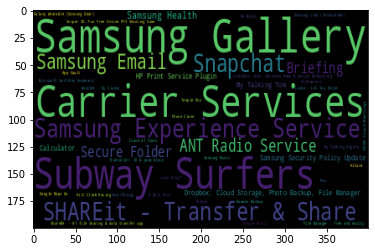

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mimage
img = mimage.imread('WordCloud.png')
imgplot = plt.imshow(img, aspect='auto')
plt.show()

## Analysis - 2) Best developer based on the apps developed

In [ ]:
task2 = GoogleDf.groupBy("Developer Id").count().sort('count', ascending = False)
task2.show()

+--------------------+-----+
|        Developer Id|count|
+--------------------+-----+
|       Subsplash Inc| 5013|
|          TRAINERIZE| 4773|
|             ChowNow| 4468|
|             Phorest| 2620|
|BH App Developmen...| 2270|
|          Sharefaith| 1925|
|            Flipdish| 1825|
|          J&M Studio| 1795|
|           OrderYOYO| 1712|
|          CyJ Studio| 1618|
|             Apptegy| 1594|
|      +HOME by Ateam| 1485|
|        Magzter Inc.| 1481|
|Branded Apps by M...| 1459|
|Currency Converte...| 1414|
|             echurch| 1315|
|           Skalpelis| 1237|
|           TTMA Apps| 1196|
|Virtuagym Profess...| 1172|
|Branded MINDBODY ...| 1095|
+--------------------+-----+
only showing top 20 rows



In [ ]:
import plotly.express as px
pandas_df2 = task2.toPandas().head(10)
fig = px.bar(pandas_df2, y='count', x='Developer Id', text='count')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', title ="Top Developers")
fig.show()

## Analysis - 3) Main Category of apps downloaded

In [ ]:
task3 = GoogleDf.groupBy("Category").count().sort('count', ascending = False)
task3.show()

+-----------------+------+
|         Category| count|
+-----------------+------+
|        Education|213061|
|    Music & Audio|139992|
|            Tools|124570|
|         Business|123031|
|    Entertainment|122411|
|Books & Reference|105070|
|        Lifestyle|104546|
|  Personalization| 80936|
| Health & Fitness| 73155|
|     Productivity| 67487|
|         Shopping| 65101|
|     Food & Drink| 64580|
|   Travel & Local| 58467|
|          Finance| 55760|
|           Arcade| 46869|
|           Puzzle| 43780|
|           Casual| 43259|
|    Communication| 41591|
|           Sports| 40944|
|           Social| 39123|
+-----------------+------+
only showing top 20 rows



In [ ]:
# to check the number of categories
task3.count()

Out[15]: 74

In [ ]:
pandas_df3 = task3.toPandas()
fig = px.bar(pandas_df3.head(20), x="Category", y="count", color="Category", title="Main Category of Apps downloaded")
fig.show()

## Analysis - 4) Donut chart for top5 most rated apps

In [ ]:
from pyspark.sql.functions import col, asc, desc
from pyspark.sql.functions import countDistinct
task4 = GoogleDf.select('App Name','Category','Rating','Rating Count').where((col('Rating')>=4.5) & (col('Rating Count') >= 200000))
task4 = task4.sort(desc('Rating Count'))
task4.show(15)

+--------------------+-----------------+------+------------+
|            App Name|         Category|Rating|Rating Count|
+--------------------+-----------------+------+------------+
|     Indy Cat for VK|           Puzzle|   5.0|    999052.0|
|        Word Connect|             Word|   5.0|    997116.0|
|Walmart Shopping ...|         Shopping|   5.0|    987249.0|
|Bike Race Free - ...|           Racing|   5.0|    983928.0|
|MapFactor Navigat...|Maps & Navigation|   5.0|    983158.0|
|          Wordscapes|             Word|   5.0|    979745.0|
|Instasize: Photo ...|      Photography|   5.0|    961333.0|
|Happy Mall Story:...|       Simulation|   5.0|    956838.0|
|1945 Air Force - ...|           Arcade|   5.0|    953329.0|
|Phone Cleaner- Ca...|            Tools|   5.0|    941133.0|
| Prisma Photo Editor|      Photography|   5.0|    936654.0|
|DNS Changer | Mob...|            Tools|   5.0|    936634.0|
|No Crop & Square ...|      Photography|   5.0|    935284.0|
|Transparent clock...|  

In [ ]:
pandas_df4 = task4.toPandas().head(5)
import plotly.graph_objects as go

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=pandas_df4['App Name'], values=pandas_df4['Rating Count'], hole=.3)])
fig.update_layout( title="Donut Chart for top 5 most rated Apps",
                 legend_title="App name")

fig.show()

## Analysis - 5) Pandemic Analysis for the year 2020 - 2021

In [ ]:
# Take the data for in a separate spark dataframe for 2020 and 2021
df_2020 = GoogleDf.filter(col('Released').contains("2020"))
df_2021 = GoogleDf.filter(col('Released').contains("2021"))

In [ ]:
# Combine the two dataframe
df_union = df_2020.union(df_2021)
df_new = df_union.select('App Name','App Id','Category','Rating','Rating Count','Maximum Installs','Developer Id','Released')
display(df_new.show(10))

+--------------------+--------------------+-----------------+------+------------+----------------+--------------------+----------+
|            App Name|              App Id|         Category|Rating|Rating Count|Maximum Installs|        Developer Id|  Released|
+--------------------+--------------------+-----------------+------+------------+----------------+--------------------+----------+
|             Gakondo| com.ishakwe.gakondo|        Adventure|   0.0|         0.0|            15.0|Jean Confident Ir...|2020-02-26|
| Ampere Battery Info|com.webserveis.ba...|            Tools|   4.0|        64.0|          7662.0|          Webserveis|2020-05-21|
|             GROW.me|com.horodyski.grower|            Tools|   0.0|         0.0|           478.0|Rafal Milek-Horod...|2020-02-21|
|     Dodge The Cars!|com.MrScratchEnte...|           Racing|   5.0|        55.0|           329.0|           MrScratch|2020-07-30|
|        be.MOBILISED|com.hastobe.bemob...|Maps & Navigation|   0.0|         0.0|  

#### Most downloaded app in pandemic

In [ ]:
# Most downloaded application during pandemic
pandemic_task1 = df_new.select('App Name','Maximum Installs').sort('Maximum Installs', ascending = False).show(1)

+-------------------+----------------+
|           App Name|Maximum Installs|
+-------------------+----------------+
|Weather - By Xiaomi|    7.11617649E8|
+-------------------+----------------+
only showing top 1 row



#### Top category  of app downloaded in pandemic

In [ ]:
# Top category of app in Pandemic
pandemic_task2 = df_new.groupBy("Category").count().sort('count', ascending = False).show(1)

+---------+-----+
| Category|count|
+---------+-----+
|Education|68886|
+---------+-----+
only showing top 1 row



#### Best developer during the pandemic

In [ ]:
# Best developer during pandemic
pandemic_task3 = df_new.groupBy("Developer Id").count().sort('count', ascending = False).show(1)

+------------+-----+
|Developer Id|count|
+------------+-----+
|  TRAINERIZE| 2077|
+------------+-----+
only showing top 1 row



#### Top rated application in pandemic

In [ ]:
# Top rated application in pandemic
pandemic_task4 = df_new.select('App Name','Category','Rating','Rating Count').where((col('Rating')>=4.5) & (col('Rating Count') >= 200000))
pandemic_task4 = pandemic_task4.sort(desc('Rating Count')).show(1)

+--------------------+--------+------+------------+
|            App Name|Category|Rating|Rating Count|
+--------------------+--------+------+------------+
|Brain Test 2: Tri...|  Trivia|   5.0|    856811.0|
+--------------------+--------+------+------------+
only showing top 1 row



## Analysis - 6) Distribution of Free and Paid apps in the play store

In [ ]:
task6 = GoogleDf.groupBy('Free').count().where(col('count') >=3 )
task6.show()

+-----+-------+
| Free|  count|
+-----+-------+
|False|  38658|
| True|1980908|
+-----+-------+



In [ ]:
pandas_df6 = task6.toPandas()

import plotly.graph_objects as go
# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=pandas_df6['Free'], values=pandas_df6['count'], pull=[0.4])])
fig.update_layout( title="Distribution of Free Apps",
                 legend_title="Free")
fig.show()

## Analysis - 7 ) To find the Country with maximum apps installed

In [ ]:
task7 = GoogleDf.where((col('Currency')!='0.0') & (col('Currency')!='True') & (col('Currency')!='XXX') & (col('Currency')!='1.99')).groupBy('Currency').count()
task7.show()

+--------+-------+
|Currency|  count|
+--------+-------+
|     GBP|      3|
|     BRL|      1|
|     CAD|      2|
|     EUR|      5|
|     KRW|      1|
|     INR|      5|
|     USD|2018350|
|     VND|      1|
|     TRY|      1|
|     ZAR|      1|
|     AUD|      1|
|     SGD|      1|
+--------+-------+



In [ ]:
mapdf = task7.toPandas()
country_names = ['United Kingdom', 'Brazil','Canada','Europe','South Korea','India','United States','Vietnam','Turkey','South Africa','Australia','Singapore']
mapdf['Country'] = country_names
mapdf

,Currency,count,Country
0,GBP,3,United Kingdom
1,BRL,1,Brazil
2,CAD,2,Canada
3,EUR,5,Europe
4,KRW,1,South Korea
5,INR,5,India
6,USD,2018350,United States
7,VND,1,Vietnam
8,TRY,1,Turkey
9,ZAR,1,South Africa


In [ ]:
fig = px.bar(mapdf, x="Country", y="count", color="Currency", title="Country with maximum apps installed")
fig.show()

## Analysis -8) App Rating Distribution

In [ ]:
from pyspark.sql.functions import col
data = GoogleDf.select('App Name','Rating','Rating Count').groupBy('Rating').count().where((col("count") != 1) & (col("count") != 2) & (col("count") != 3)).sort('Rating')

In [ ]:
data.show()

+------+------+
|Rating| count|
+------+------+
|   0.0|945134|
|   1.0|  2679|
|   2.0| 35087|
|   3.0|127476|
|   4.0|602154|
|   5.0|307036|
+------+------+



In [ ]:
# let's have a look at the distribution of our target variable:
# to make it look better, we first convert our spark df to a Pandas df
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
df_pd = data.toPandas()

fig = go.Figure(data=[go.Pie(labels=df_pd['Rating'], values=df_pd['count'])])
fig.update_layout( title="Pie chart of User Ratings",
                 legend_title="Rating Distribution")
fig.update_traces(hoverinfo='label+percent',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()